In [1]:
# WELCOME! In this final project, I will examine the relationship of class by income as 
# related to socioeconomic variables regarding 
# the environment (using the Measure of America Data Set which is grouped by U.S. States).

In [2]:
# NUMBER ONE: For my first hypothesis test I will examine the relationship between GDP and Carcinogen
# output across U.S. States. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/Users/caitlin/Desktop/Measure of America Dataset.csv')

In [5]:
median_GDP = np.median(df['State Per Capita GDP ($)'].dropna())
median_GDP

40970.0

In [6]:
# Grouping states by high and low GDP:
lowGDP_df = df[df['State Per Capita GDP ($)'] <= median_GDP]
highGDP_df = df[df['State Per Capita GDP ($)'] > median_GDP]

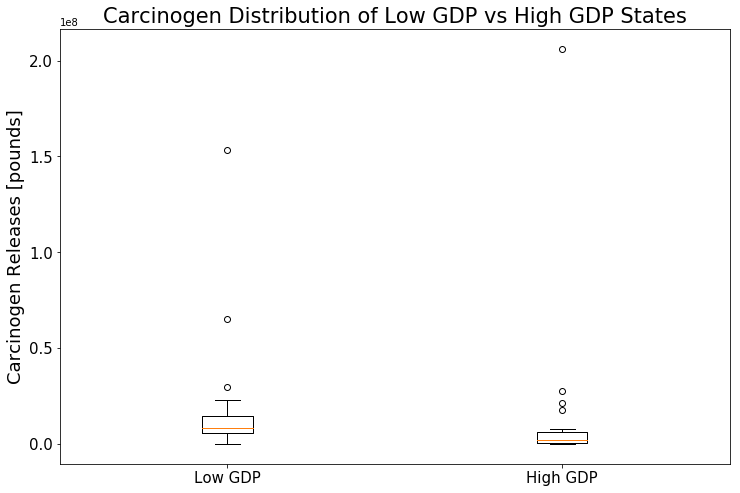

In [7]:
# Visualization: 
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([lowGDP_df['Carcinogen Releases (pounds)'].dropna(), highGDP_df['Carcinogen Releases (pounds)'].dropna()])
plt.title('Carcinogen Distribution of Low GDP vs High GDP States', fontsize=21)
axs.set_xticklabels(['Low GDP','High GDP'])
axs.set_ylabel('Carcinogen Releases [pounds]', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [8]:
# Calculating average Carcinogen Level between two groups (High GDP and Low GDP States):
print("Low GDP States Carcinogen Level:", np.mean(lowGDP_df['Carcinogen Releases (pounds)'].dropna()))
print("High GDP States Carcinogen Level:", np.mean(highGDP_df['Carcinogen Releases (pounds)'].dropna()))

Low GDP States Carcinogen Level: 17442512.653846152
High GDP States Carcinogen Level: 12822930.56


In [9]:
# Computing 95% CI of mean by using this function:
def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))

In [10]:
# 95% CI of mean carcinogen level for Low GDP states:
CI_mean(lowGDP_df['Carcinogen Releases (pounds)'])

Average is: 17442512.653846152
95% CI of mean is: (5917498.138772149, 28967527.168920156)


In [11]:
# 95% CI of mean carcinogen level for High GDP states:
CI_mean(highGDP_df['Carcinogen Releases (pounds)'])

Average is: 12822930.56
95% CI of mean is: (-2892394.6398111377, 28538255.75981114)


In [12]:
# Function to compute 95% CI of mean difference:
def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))

In [13]:
# Reporting average difference and 95% CI:
CI_mean_diff(lowGDP_df['Carcinogen Releases (pounds)'], highGDP_df['Carcinogen Releases (pounds)'])

The average difference is: 4619582.093846152
The 95% CI is: (-14868809.469042907, 24107973.65673521)


In [14]:
# Conducting a two sample t-test:
from scipy import stats

t_val, p_val = stats.ttest_ind(lowGDP_df['Carcinogen Releases (pounds)'].dropna(), highGDP_df['Carcinogen Releases (pounds)'].dropna(), equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 0.4553443187736934
p-value: 0.6510803770292449


In [15]:
# CONCLUSION: The average difference was 
# 4,619,582.09 lbs (95% CI = [(-14,868,809.47, 24,107,973.66)]).
# With this large difference I would’ve expected to reject the null hypothesis. 
# However, the high variance may be due in part to the outliers and is probably the reason 
# the null hypothesis could not be rejected. 

In [16]:
# NUMBER TWO: Now I will plot median income vs water consumption and examine their 
# relationship in a scatter plot. 

In [17]:
from scipy import stats

In [18]:
# Are states with higher median earnings more likely to have higher water consumption? 
# Or, are there more likely to have less?

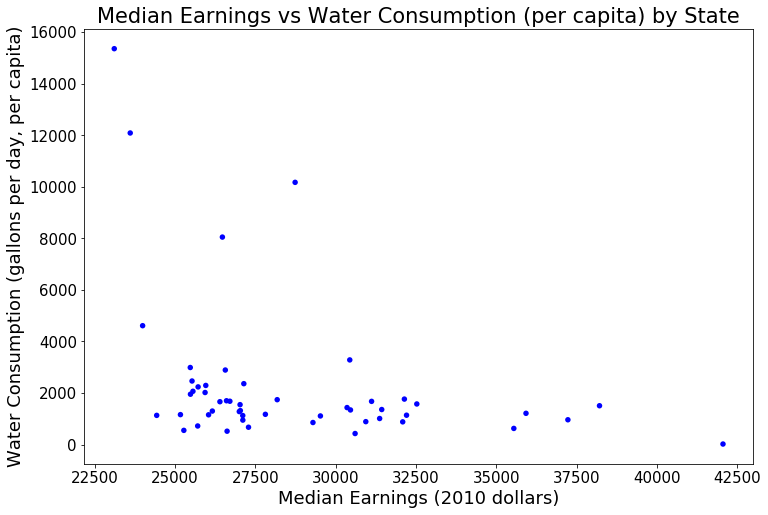

In [19]:
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(df['Median Earnings (2010 dollars)'], df['Water Consumption (gallons per day, per capita)'], c='blue', edgecolors='none', s=30)
plt.title("Median Earnings vs Water Consumption (per capita) by State", fontsize=21)
axs.set_xlabel("Median Earnings (2010 dollars)", fontsize=18)
axs.set_ylabel("Water Consumption (gallons per day, per capita)", fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [20]:
# I drop nans in two columns specified here:
new_df = df.dropna(subset=['Median Earnings (2010 dollars)','Water Consumption (gallons per day, per capita)'])

In [21]:
# Obtain summary statistics:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = new_df['Median Earnings (2010 dollars)']
y_vals = new_df['Water Consumption (gallons per day, per capita)']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                          
===========================================================================================================
Dep. Variable:     Water Consumption (gallons per day, per capita)   R-squared:                       0.123
Model:                                                         OLS   Adj. R-squared:                  0.105
Method:                                              Least Squares   F-statistic:                     6.871
Date:                                             Wed, 23 Dec 2020   Prob (F-statistic):             0.0116
Time:                                                     23:53:01   Log-Likelihood:                -475.27
No. Observations:                                               51   AIC:                             954.5
Df Residuals:                                                   49   BIC:                             958.4
Df Model:                                                        1                                         
Covariance Type:                                         nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           9644.9753   2838.369      3.398      0.001    3941.059    1.53e+04
Median Earnings (2010 dollars)    -0.2574      0.098     -2.621      0.012      -0.455      -0.060
==============================================================================
Omnibus:                       49.657   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.560
Skew:                           2.744   Prob(JB):                     1.87e-41
Kurtosis:                      10.626   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Report p-value and correlation coefficient: 
from scipy import stats
corr = stats.pearsonr(new_df['Median Earnings (2010 dollars)'], new_df['Water Consumption (gallons per day, per capita)'])
print('Correlation coefficient:', corr[0])
print('p-value:', corr[1])

Correlation coefficient: -0.3506944888685202
p-value: 0.011633685520426028


In [23]:
b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(new_df['Median Earnings (2010 dollars)']), np.max(new_df['Median Earnings (2010 dollars)']), 100)

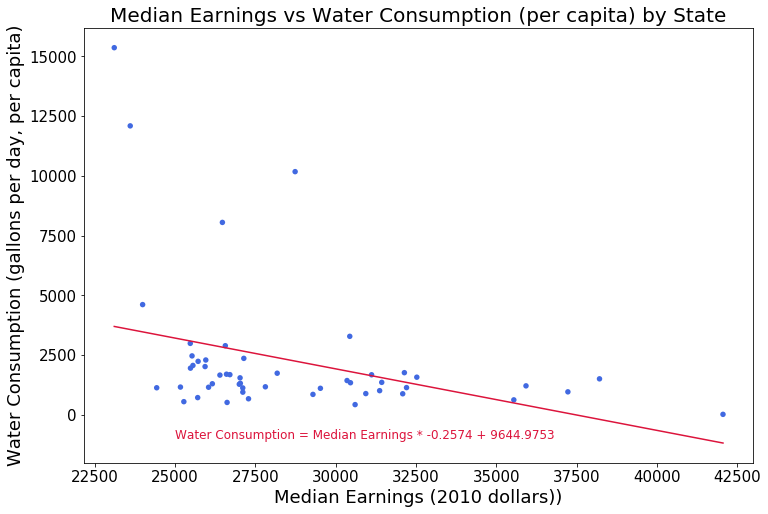

In [24]:
# Create a scatterplot: 
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(df['Median Earnings (2010 dollars)'], df['Water Consumption (gallons per day, per capita)'], c='royalblue', edgecolors='none', s=30)
plt.title("Median Earnings vs Water Consumption (per capita) by State", fontsize=20)
axs.set_xlabel("Median Earnings (2010 dollars))", fontsize=18)
axs.set_ylabel("Water Consumption (gallons per day, per capita)", fontsize=18)
axs.plot(x_plot, x_plot*b1 + b0, color='crimson')
axs.tick_params(labelsize=15)
plt.text(25000, -1000, "Water Consumption = Median Earnings * -0.2574 + 9644.9753", fontsize=12, color='crimson')
plt.show()

In [25]:
# CONCLUSION: A significant regression equation was found at p<0.05 
# but not significant at p<.001. The correlation coefficient between the two variables was 
# -0.35 (p<0.05, p>0.01). 
# This implies that, there is only a weak negative correlation between water consumption 
# and median earnings. 



In [26]:
# NUMBER THREE: Now I will find states with high management vs low management percentages 
# and find out if there is any correlation between states with high management and 
# carbon dioxide emissions because my hypothesis is that states with high management 
# (aka the bourgeoisie) have less pollution but are perhaps higher causes of pollution. 
# They manage in their "castles on the hill" but pollute in their "valleys below". 
# This also would make sense because rural states with less management sector
# might emit more carbon dioxide per capita for farming operations. 

In [27]:
median_Mngmnt = np.median(df['Management, professional, and related occupations (%)'].dropna())
median_Mngmnt

33.9

In [28]:
lowMngmnt_df = df[df['Management, professional, and related occupations (%)'] <= median_Mngmnt]
highMngmnt_df = df[df['Management, professional, and related occupations (%)'] > median_Mngmnt]

In [29]:
# Calculating average carbon dioxide emissions per capita between two groups --
# (High Management and Low Management States)
lowMean = np.mean(lowMngmnt_df['Carbon Dioxide Emissions (metric tons per capita)'].dropna())
highMean = np.mean(highMngmnt_df['Carbon Dioxide Emissions (metric tons per capita)'].dropna())
New_DF = (lowMean, highMean)
print("Low Management States C02 Level:", np.mean(lowMngmnt_df['Carbon Dioxide Emissions (metric tons per capita)'].dropna()))
print("High Management States C02 Level:", np.mean(highMngmnt_df['Carbon Dioxide Emissions (metric tons per capita)'].dropna()))

Low Management States C02 Level: 29.14444444444444
High Management States C02 Level: 20.627916666666668


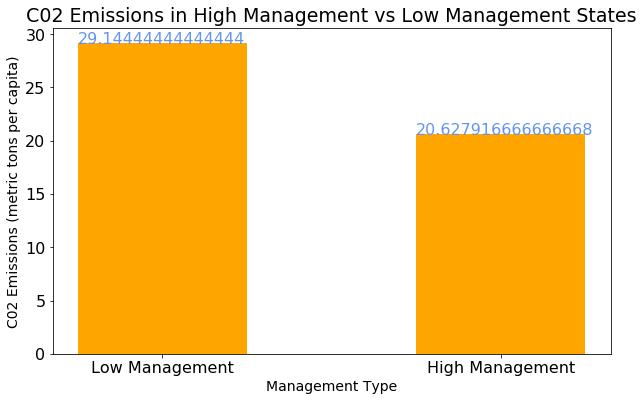

In [30]:
# Create a visualization: 
x_values = ['Low Management', 'High Management']
y_values = New_DF

fig, axs = plt.subplots(figsize=(10,6)) # Change the figure size here       
axs.bar(x_values, y_values, color=('orange'), width=0.5) # You specify the color here     
axs.set_title("C02 Emissions in High Management vs Low Management States", fontsize=19)   
axs.set_xlabel("Management Type", fontsize=14)
axs.set_ylabel("C02 Emissions (metric tons per capita)", fontsize=14)
axs.tick_params(labelsize=16)       

for i in range(len(x_values)):
    plt.text(i-0.25, y_values[i], str(y_values[i]), color='cornflowerblue', size=16)


plt.show() 



In [31]:
# Conducting a two sample t-test:
t_val, p_val = stats.ttest_ind(lowMngmnt_df['Carbon Dioxide Emissions (metric tons per capita)'].dropna(), highMngmnt_df['Carbon Dioxide Emissions (metric tons per capita)'].dropna(), equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 1.5994185672671033
p-value: 0.11622889654510264


In [32]:
# 95% CI of mean C02 level for Low Management states:
CI_mean(lowMngmnt_df['Carbon Dioxide Emissions (metric tons per capita)'])

Average is: 29.14444444444444
95% CI of mean is: (21.320354916164572, 36.9685339727243)


In [33]:
# 95% CI of mean C02 level for High Management states:
CI_mean(highMngmnt_df['Carbon Dioxide Emissions (metric tons per capita)'])

Average is: 20.627916666666668
95% CI of mean is: (14.035429139059573, 27.220404194273762)


In [34]:
# Report average difference and the 95% CI: 
CI_mean_diff(lowMngmnt_df['Carbon Dioxide Emissions (metric tons per capita)'], highMngmnt_df['Carbon Dioxide Emissions (metric tons per capita)'])

The average difference is: 8.516527777777771
The 95% CI is: (-1.7146631963070025, 18.747718751862543)


In [35]:
# CONCLUSION: I am perplexed because the two means lie outside each other’s 
# confidence intervals so I am surprised p>0.05. 
# The average difference was 8.516 metric tons per capita 
# (95% CI is: [-1.7146631963070025, 18.747718751862543]). 
# With this large difference I would’ve expected to reject the null hypothesis. 
# However, there may be a large variance as indicated by the wide confidence interval 
# and this is probably the reason the null hypothesis could not be rejected. 

In [36]:
# NUMBER FOUR: Now I will conduct a chi-square test between mostly urban and voter turnout 
# by state. Do urban states have higher voter turnout or less? Voter turnout is important 
# for the environmental movement as an intersectional movement fighting for more democracy 
# and justice in all it's forms. We cannot save the planet unless there is a political
# paradigm shift! 

# Here, I grouped urban and rural states at the median because this dataset is organized by 
# state and there was not a cleaner way to group them otherwise. 

median_urban = np.median(df['Urban Population (%)'].dropna())
median_urban

urban_df = df[df['Urban Population (%)'] >= median_urban]
rural_df = df[df['Urban Population (%)'] < median_urban]

In [37]:
data = df[['State','Urban Population (%)', 'Rural Population (%)', 'Turnout (% of eligible voters who voted)']]
data = data.dropna()
data

,State,Urban Population (%),Rural Population (%),Turnout (% of eligible voters who voted)
0,Alabama,59.04,40.96,58.9
1,Alaska,66.02,33.98,58.9
2,Arizona,89.81,10.19,52.9
3,Arkansas,56.16,43.84,50.5
4,California,94.95,5.05,55.2
5,Colorado,86.15,13.85,70.3
6,Connecticut,87.99,12.01,60.9
7,Delaware,83.30,16.70,62.7
8,District of Columbia,100.00,0.00,61.9
9,Florida,91.16,8.84,63.5


In [38]:
# Function to make Urban vs Rural a categorical variable: 
def function(row):
    if row['Urban Population (%)'] >= median_urban:
        return 'Urban'
    elif row['Urban Population (%)'] < median_urban:
        return 'Rural'
    else:
        return 'NaN'

In [39]:
data['Urban or Rural'] = data.apply(function, axis=1)

In [40]:
median_turnout = np.median(df['Turnout (% of eligible voters who voted)'].dropna())
median_turnout

59.7

In [41]:
# Function to make voter turnout a categorical variable: 
def function(turnout):
    if turnout['Turnout (% of eligible voters who voted)'] <= median_turnout:
        return 'Low Turnout'
    else:
        return 'High Turnout'

In [42]:
data['Turnout_1'] = data.apply(function, axis=1)

In [43]:
# Chi-Sq table: 
table = pd.crosstab(index=data["Urban or Rural"], columns=data["Turnout_1"]) 
table

Turnout_1,High Turnout,Low Turnout
Urban or Rural,,
Rural,12,13
Urban,13,13


In [44]:
# Finding the proportion of State types (urban vs rural) with "high voter turnout":
table['Total'] = table['High Turnout'] + table['Low Turnout']
table['High_Turnout_per'] = table['High Turnout'] / table['Total']

print(table)

Turnout_1       High Turnout  Low Turnout  Total  High_Turnout_per
Urban or Rural                                                    
Rural                     12           13     25              0.48
Urban                     13           13     26              0.50


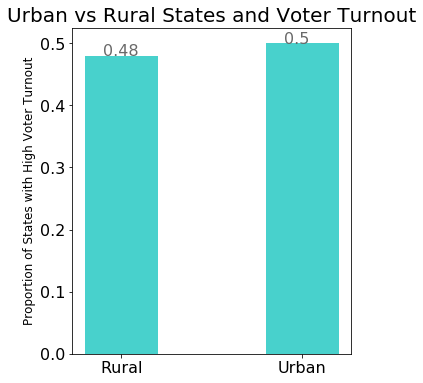

In [45]:
# Create a visualization: 
x_values = ['Rural', 'Urban']
y_values = table['High_Turnout_per']

fig, axs = plt.subplots(figsize=(5,6)) # Change the figure size here       
axs.bar(x_values, y_values, color=('mediumturquoise'), width=0.4) # You specify the color here     
axs.set_title("Urban vs Rural States and Voter Turnout", fontsize=20)   
axs.set_xlabel("", fontsize=14)
axs.set_ylabel("Proportion of States with High Voter Turnout", fontsize=12)
axs.tick_params(labelsize=16)       


for i in range(len(x_values)):
    plt.text(i-0.1, y_values[i], str(y_values[i]), color='dimgray', size=16)
    
plt.show() 

In [46]:
# Run chi-sq test: 
from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(table)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)

chi2: 0.020400628064371942
p: 0.9992297571075016
dof: 3
expected: [[12.25480676 12.74499903 24.99980579  0.48038842]
 [12.74519324 13.25500097 26.00019421  0.49961158]]


In [47]:
# Function for 95% confidence interval of proportion difference: 
def CI_prop_diff(s1, s2, n1, n2):
    p1 = s1 / n1
    p2 = s2 / n2
    se2p1 = p1 * (1 - p1) / n1
    se2p2 = p2 * (1 - p2) / n2
    se2 = se2p1 + se2p2
    se = np.sqrt(se2)
    low = (p1 - p2) - 1.96 * se
    up = (p1 - p2) + 1.96 * se
    print("Proportion difference is:", p1 - p2)
    print("95% CI is: ({}, {})".format(low, up))

In [48]:
table

Turnout_1,High Turnout,Low Turnout,Total,High_Turnout_per
Urban or Rural,,,,
Rural,12,13,25,0.48
Urban,13,13,26,0.50


In [49]:
# Report proportion difference and 95% CI: 
CI_prop_diff(s1=12, s2=13, n1=25, n2=26)

Proportion difference is: -0.020000000000000018
95% CI is: (-0.29439569227387946, 0.2543956922738794)


In [50]:
12 + 13 + 13 + 13

51

In [51]:
# CONCLUSION: The data provides weak evidence that the proportion of states with high voter 
# turnout was less in rural states than in urban states (chi2(1, N=51)
# The observed proportion difference was -0.020 (95% CI = [-0.249,0.254]).

In [52]:
# NUMBER FIVE: Here, I will conduct one more regression test to examine the 
# relationship between energy consumption and poverty rate:

In [53]:
# Is state-level poverty rate correlated with energy consumption?

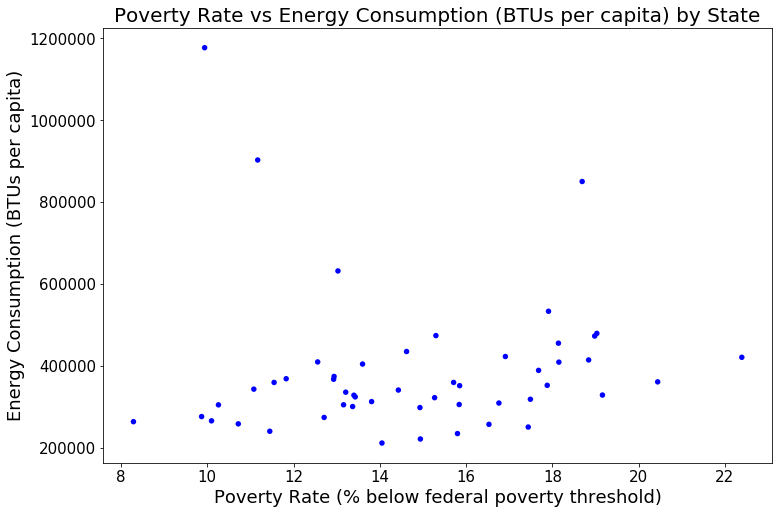

In [54]:
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(df['Poverty Rate (% below federal poverty threshold)'], df['Energy Consumption (BTUs per capita)'], c='blue', edgecolors='none', s=30)
plt.title("Poverty Rate vs Energy Consumption (BTUs per capita) by State", fontsize=20)
axs.set_xlabel("Poverty Rate (% below federal poverty threshold)", fontsize=18)
axs.set_ylabel("Energy Consumption (BTUs per capita)", fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [55]:
# I drop nans in two columns specified here:
newly_df = df.dropna(subset=['Poverty Rate (% below federal poverty threshold)','Energy Consumption (BTUs per capita)'])

In [56]:
# Obtain summary statistics: 
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = newly_df['Poverty Rate (% below federal poverty threshold)']
y_vals = newly_df['Energy Consumption (BTUs per capita)']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Energy Consumption (BTUs per capita)   R-squared:                       0.000
Model:                                              OLS   Adj. R-squared:                 -0.020
Method:                                   Least Squares   F-statistic:                   0.01180
Date:                                  Wed, 23 Dec 2020   Prob (F-statistic):              0.914
Time:                                          23:53:04   Log-Likelihood:                -687.24
No. Observations:                                    51   AIC:                             1378.
Df Residuals:                                        49   BIC:                             1382.
Df Model:                                             1                                         
Covariance Type:                              nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             3.734e+05   1.19e+05      3.135      0.003    1.34e+05    6.13e+05
Poverty Rate (% below federal poverty threshold)   856.8705   7888.066      0.109      0.914    -1.5e+04    1.67e+04
==============================================================================
Omnibus:                       52.014   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.731
Skew:                           2.796   Prob(JB):                     1.30e-50
Kurtosis:                      11.766   Cond. No.                         73.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Report correlation coefficient and p-value: 
from scipy import stats
corr = stats.pearsonr(new_df['Poverty Rate (% below federal poverty threshold)'], new_df['Energy Consumption (BTUs per capita)'])
print('Correlation coefficient:', corr[0])
print('p-value:', corr[1])

Correlation coefficient: 0.015516520338397824
p-value: 0.9139406040593546


In [58]:
b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(newly_df['Poverty Rate (% below federal poverty threshold)']), np.max(newly_df['Poverty Rate (% below federal poverty threshold)']), 100)

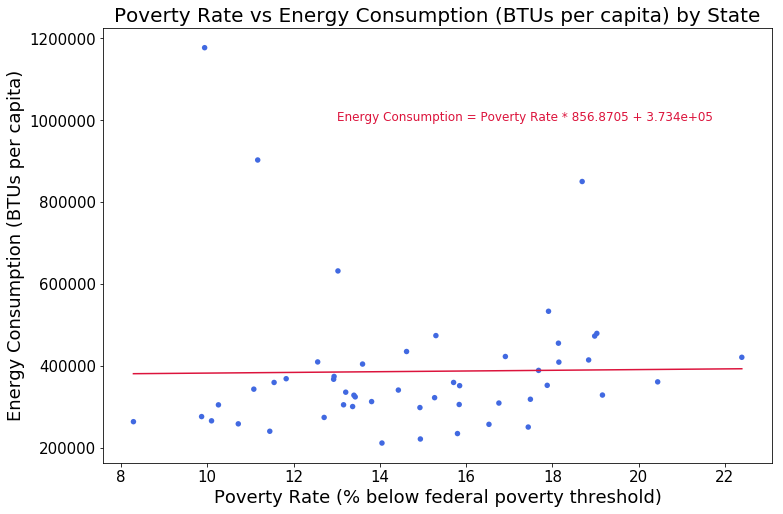

In [59]:
# Create a visualization: 
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(df['Poverty Rate (% below federal poverty threshold)'], df['Energy Consumption (BTUs per capita)'], c='royalblue', edgecolors='none', s=30)
plt.title("Poverty Rate vs Energy Consumption (BTUs per capita) by State", fontsize=20)
axs.set_xlabel("Poverty Rate (% below federal poverty threshold)", fontsize=18)
axs.set_ylabel("Energy Consumption (BTUs per capita)", fontsize=18)
axs.plot(x_plot, x_plot*b1 + b0, color='crimson')
axs.tick_params(labelsize=15)
plt.text(13, 1000000, "Energy Consumption = Poverty Rate * 856.8705 + 3.734e+05", fontsize=12, color='crimson')
plt.show()

In [60]:
# CONCLUSION: the states’ energy consumption (per capita) increased by 856.870 BTUs 
# per capita for every one percent increase in poverty rate (95% CI = -1.5e+04, 1.67e+04]). 
# The correlation coefficient between the two variables was 0.015 which is very low (p>.05). 
# This implies that, there is no correlation or relationship between state level poverty rate 
# and energy consumption. 

In [61]:
# SIXTH VISUALIZATION (GROUPED HISTOGRAM): Lastly, I will create a grouped histogram to 
# visualize the relationship between urban states vs rural states and state per capita GDP. 

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('/Users/caitlin/Desktop/Measure of America Dataset.csv')
df = df[['State','State Per Capita GDP ($)','Urban Population (%)']]
df = df.dropna()
df

,State,State Per Capita GDP ($),Urban Population (%)
0,Alabama,32354.0,59.04
1,Alaska,61202.0,66.02
2,Arizona,34676.0,89.81
3,Arkansas,31547.0,56.16
4,California,44898.0,94.95
5,Colorado,45913.0,86.15
6,Connecticut,55143.0,87.99
7,Delaware,61737.0,83.30
8,District of Columbia,147965.0,100.00
9,Florida,34440.0,91.16


In [64]:
# Grouping states into urban vs rural categories: 
mean_urban = np.mean(df['Urban Population (%)'].dropna())
mean_urban

urban_df = df[df['Urban Population (%)'] >= 70]
rural_df = df[df['Urban Population (%)'] < 70]
# o
len(urban_df)

33

In [65]:
# Finding the min and max for each so that the scale on my visualization is easy to read:
min(rural_df['State Per Capita GDP ($)'])

28337.0

In [66]:
min(urban_df['State Per Capita GDP ($)'])

32025.0

In [67]:
max(rural_df['State Per Capita GDP ($)'])

61202.0

In [68]:
max(urban_df['State Per Capita GDP ($)'])

147965.0

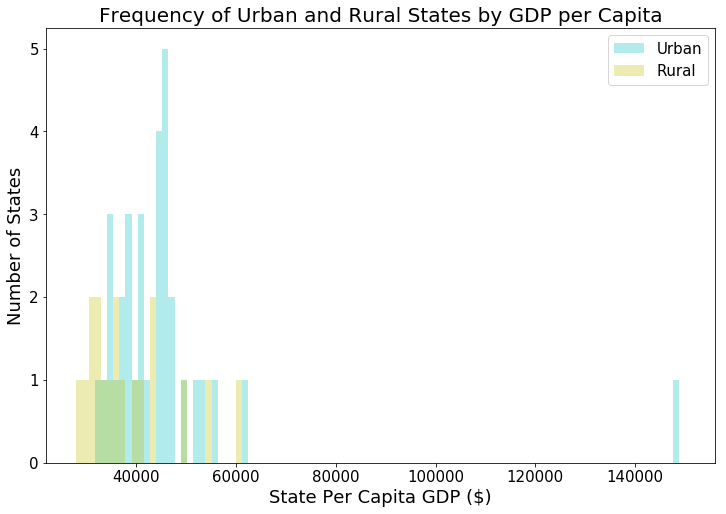

In [69]:
# Create a grouped histogram: 
fig, axs = plt.subplots(figsize=(12,8))
axs.hist(urban_df['State Per Capita GDP ($)'], color="c", alpha=0.3, 
         bins=np.linspace(28000,150000,100), label="Urban")
axs.hist(rural_df['State Per Capita GDP ($)'], color="y", alpha=0.3,
         bins=np.linspace(28000,150000,100), label="Rural")

plt.title("Frequency of Urban and Rural States by GDP per Capita", fontsize=20)
axs.set_xlabel("State Per Capita GDP ($)", fontsize=18)
axs.set_ylabel("Number of States", fontsize=18)
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})

plt.show()

In [70]:
# CONCLUSION: Rural states seem to be slightly skewed towards the 
# low end of GDP because some of the rural states are lower than any of 
# the urban states whereas, high GDP states may be skewed towards higher 
# GDP as shown by the peak in urban states around 48000 and the one outlier 
# urban state (District of Columbia). 